<a href="https://colab.research.google.com/github/Subhash23jan/ML-LAB/blob/main/week8/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

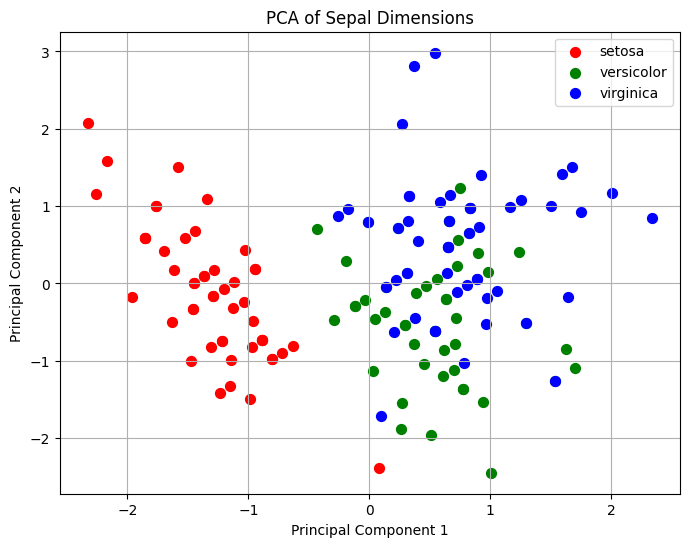

Explained variance for PCA of Sepal Dimensions: [0.55468462 0.44531538]


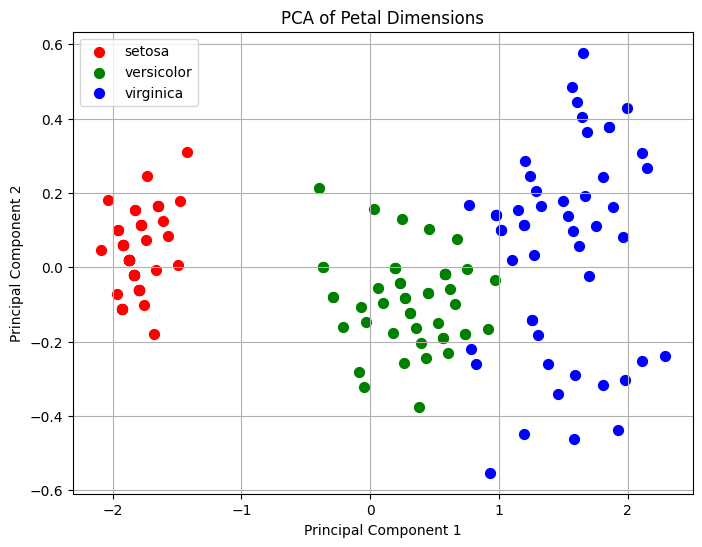

Explained variance for PCA of Petal Dimensions: [0.98137855 0.01862145]


In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the Iris dataset from a CSV file
file_path = '/content/iris.csv'  # Update with the path to your CSV file
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df = pd.read_csv(file_path)

# Ensure columns match expected headers
if list(df.columns) != columns:
    df.columns = columns

# Function to perform PCA and plot the results
def perform_pca_and_plot(df, feature_cols, title):
    X = df[feature_cols].values
    y = df['species'].values

    # Standardize the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Apply PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    # Create a DataFrame for the PCA results
    pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
    pca_df['Species'] = y

    # Visualize the PCA results
    plt.figure(figsize=(8, 6))
    colors = ['r', 'g', 'b']
    species_unique = df['species'].unique()
    for target, color in zip(species_unique, colors):
        indices_to_keep = pca_df['Species'] == target
        plt.scatter(pca_df.loc[indices_to_keep, 'Principal Component 1'],
                    pca_df.loc[indices_to_keep, 'Principal Component 2'],
                    c=color,
                    s=50)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(title)
    plt.legend(species_unique)
    plt.grid()
    plt.show()

    # Explained variance
    explained_variance = pca.explained_variance_ratio_
    print(f"Explained variance for {title}: {explained_variance}")

# Perform PCA and plot for sepal_length and sepal_width
perform_pca_and_plot(df, ['sepal_length', 'sepal_width'], 'PCA of Sepal Dimensions')

# Perform PCA and plot for petal_length and petal_width
perform_pca_and_plot(df, ['petal_length', 'petal_width'], 'PCA of Petal Dimensions')
